# Encoding 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data={'Favourite Color':['Blue','Red','Green','Blue','Green','Green','Blue'],
      'Height (cm)':[1.77,1.32,146,1.56,1.77,1.89,1.34],
      'Loves Troll2':[1,0,1,0,1,0,0]}

In [3]:
df=pd.DataFrame(data)

In [4]:
df

,Favourite Color,Height (cm),Loves Troll2
0,Blue,1.77,1
1,Red,1.32,0
2,Green,146.00,1
3,Blue,1.56,0
4,Green,1.77,1
5,Green,1.89,0
6,Blue,1.34,0


## One-Hot Encoding
#### Most common way to convert the discrete feature into numerical values.
#### It basically assign each unique discrete variable as new feature

In [5]:
def oneHot(df,label):
    df_onehot=pd.DataFrame()
    for val in df[label]:
        df_onehot[val+'_']=np.where(df[label]==val,1,0)
    return df_onehot

In [6]:
onehot_df=oneHot(df,'Favourite Color')
onehot_df

,Blue_,Red_,Green_
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0


## Label Encoding 
#### Giving just oredr based rank for unique label randomly

In [7]:
def label_encoding(df, label):
    df_encoded = df.copy()
    unique_vals = df[label].unique()
    mapping = {val: idx for idx, val in enumerate(unique_vals)}
    df_encoded[label + '_encoded'] = df[label].map(mapping)
    return df_encoded

In [8]:
label_encoding(df,'Favourite Color')

,Favourite Color,Height (cm),Loves Troll2,Favourite Color_encoded
0,Blue,1.77,1,0
1,Red,1.32,0,1
2,Green,146.00,1,2
3,Blue,1.56,0,0
4,Green,1.77,1,2
5,Green,1.89,0,2
6,Blue,1.34,0,0


## Target Label Encoding
#### Instead of giving random rank to variable we calculate the mean of the target which we want to predict

In [9]:
df.groupby('Favourite Color')['Loves Troll2'].mean().sort_values().index

Index(['Red', 'Blue', 'Green'], dtype='object', name='Favourite Color')

In [10]:
def target_guided_mean_encoding(df, feature, target):
    # Calculate mean of the target for each category
    mean_target = df.groupby(feature)[target].mean()
    df[feature + '_mean_encoded'] = df[feature].map(mean_target)
    
    return df

In [11]:
target_guided_mean_encoding(df,'Favourite Color','Loves Troll2')

,Favourite Color,Height (cm),Loves Troll2,Favourite Color_mean_encoded
0,Blue,1.77,1,0.333333
1,Red,1.32,0,0.000000
2,Green,146.00,1,0.666667
3,Blue,1.56,0,0.333333
4,Green,1.77,1,0.666667
5,Green,1.89,0,0.666667
6,Blue,1.34,0,0.333333


## Bayesian Mean Encoding
#### similar to target mean encoding but here weighted mean is used 
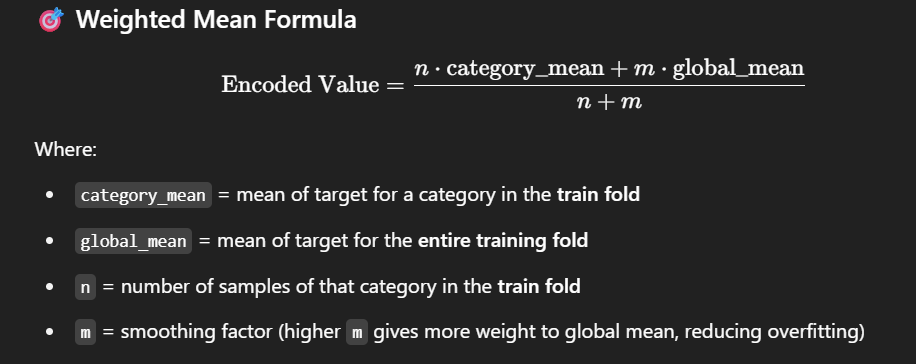

In [12]:
mean=df.groupby('Favourite Color')['Loves Troll2'].mean()
n=df.groupby('Favourite Color')['Loves Troll2'].value_counts()

In [13]:
print(mean)
print(n)

Favourite Color
Blue     0.333333
Green    0.666667
Red      0.000000
Name: Loves Troll2, dtype: float64
Favourite Color  Loves Troll2
Blue             0               2
                 1               1
Green            1               2
                 0               1
Red              0               1
Name: count, dtype: int64


In [14]:
df.groupby(['Favourite Color'])['Loves Troll2'].agg(['mean','count'])

,mean,count
Favourite Color,,
Blue,0.333333,3
Green,0.666667,3
Red,0.000000,1


In [15]:
def bayesian_encoding(df,feature,target,m=2):
    encoded_df=df.copy()
    overall_mean=df[target].mean()
    agg=df.groupby(feature)[target].agg(['mean','count'])
    weighted_mean=((agg['count']*agg['mean'] + m*overall_mean)/(agg['count']+m))
    encoded_df[feature+'_encoded']=encoded_df[feature].map(weighted_mean)
    return encoded_df
    

In [16]:
bayesian_encoding(df,'Favourite Color','Loves Troll2',2)

,Favourite Color,Height (cm),Loves Troll2,Favourite Color_mean_encoded,Favourite Color_encoded
0,Blue,1.77,1,0.333333,0.371429
1,Red,1.32,0,0.000000,0.285714
2,Green,146.00,1,0.666667,0.571429
3,Blue,1.56,0,0.333333,0.371429
4,Green,1.77,1,0.666667,0.571429
5,Green,1.89,0,0.666667,0.571429
6,Blue,1.34,0,0.333333,0.371429


## K-Fold Encoding
#### Here in this type encoding is achive similarly like the target guided weighted mean encoding i.e Bayesian Encoding but here the weighted mean is calculated of the other subset 
#### Here the K -> number of subset that we will create

In [21]:
array=df.to_numpy()
print(array)

[['Blue' 1.77 1 0.3333333333333333]
 ['Red' 1.32 0 0.0]
 ['Green' 146.0 1 0.6666666666666666]
 ['Blue' 1.56 0 0.3333333333333333]
 ['Green' 1.77 1 0.6666666666666666]
 ['Green' 1.89 0 0.6666666666666666]
 ['Blue' 1.34 0 0.3333333333333333]]


In [22]:
print(array.shape)

(7, 4)


In [28]:
row=int(np.ceil(array.shape[0]/2))
print(row)

sub1=array[0:row]
sub2=array[row:array.shape[0]]
print(sub1,end='\n')
print(sub2)

4
[['Blue' 1.77 1 0.3333333333333333]
 ['Red' 1.32 0 0.0]
 ['Green' 146.0 1 0.6666666666666666]
 ['Blue' 1.56 0 0.3333333333333333]]
[['Green' 1.77 1 0.6666666666666666]
 ['Green' 1.89 0 0.6666666666666666]
 ['Blue' 1.34 0 0.3333333333333333]]


In [29]:
from sklearn.model_selection import KFold

In [34]:
kf=KFold(n_splits=2,shuffle=False,random_state=None)
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [35]:
for train_idx, val_idx in kf.split(df):
    train_fold, val_fold = df.iloc[train_idx], df.iloc[val_idx]
    print(train_fold)
    print(val_fold)

  Favourite Color  Height (cm)  Loves Troll2  Favourite Color_mean_encoded
4           Green         1.77             1                      0.666667
5           Green         1.89             0                      0.666667
6            Blue         1.34             0                      0.333333
  Favourite Color  Height (cm)  Loves Troll2  Favourite Color_mean_encoded
0            Blue         1.77             1                      0.333333
1             Red         1.32             0                      0.000000
2           Green       146.00             1                      0.666667
3            Blue         1.56             0                      0.333333
  Favourite Color  Height (cm)  Loves Troll2  Favourite Color_mean_encoded
0            Blue         1.77             1                      0.333333
1             Red         1.32             0                      0.000000
2           Green       146.00             1                      0.666667
3            Blue        

In [36]:
kf.split(df)

<generator object _BaseKFold.split at 0x0000019E63703CD0>

In [37]:
for train_idx, val_idx in kf.split(df):
    print(train_idx)
    print(val_idx)

[4 5 6]
[0 1 2 3]
[0 1 2 3]
[4 5 6]


In [63]:
def kfold_encoding(df, feature, target, folds=5, smoothing=5, seed=42):
    df = df.copy()
    kf = KFold(n_splits=folds, shuffle=True, random_state=seed)
    
    encoded_col = pd.Series(index=df.index, dtype=float)
    
    for train_idx, val_idx in kf.split(df):
        train_fold = df.iloc[train_idx]
        val_fold = df.iloc[val_idx]
        
        # Compute category mean and count in the train fold
        means = train_fold.groupby(feature)[target].mean()
        counts = train_fold.groupby(feature)[target].count()
        
        global_mean = train_fold[target].mean()
        
        # Weighted mean formula
        weighted_means = (means * counts + global_mean * smoothing) / (counts + smoothing)
        
        # Map weighted means to validation fold
        encoded_col.iloc[val_idx] = val_fold[feature].map(weighted_means)
        
    df[f'{feature}_kfold_weighted_mean_encoded'] = encoded_col
    return df


In [62]:
kfold_encoding(df,'Favourite Color','Loves Troll2',2,42)

,Favourite Color,Height (cm),Loves Troll2,Favourite Color_mean_encoded,Favourite Color_kfold_weighted_mean_encoded
0,Blue,1.77,1,0.333333,0.318182
1,Red,1.32,0,0.000000,NaN
2,Green,146.00,1,0.666667,0.348837
3,Blue,1.56,0,0.333333,0.511628
4,Green,1.77,1,0.666667,0.500000
5,Green,1.89,0,0.666667,0.348837
6,Blue,1.34,0,0.333333,0.511628
